In [1]:
from utils.Variable_setup import *
from utils.Extraction_functions import *
from utils.ICC_functions import *
from utils.Plotting_functions import *
import numpy as np
import os
import nibabel as nib


200724-14:22:37,926 nipype.utils INFO:
	 Running nipype version 1.5.0-rc1 (latest: 1.5.0)


In [2]:
metrics = Metrics
paradigms = Metrics_paradigms + Extracted_Metrics_paradigms

In [30]:
proc='Regular'
digm='Single_Band'
metric='Fractional_Anisotropy'
floc = os.path.join(Voxelwise_maps_path,proc,digm)
ICC = nib.load(os.path.join(floc,metric+'_ICC.nii'))
CVws = nib.load(os.path.join(floc,metric+'_CVws.nii'))
CVbs = nib.load(os.path.join(floc,metric+'_CVbs.nii'))


In [37]:
ROIS

['AFANT_L_DTI_OUT_GDT.nii',
 'AFANT_R_DTI_OUT_GDT.nii',
 'AFLONG_L_DTI_OUT_GDT.nii',
 'AFLONG_R_DTI_OUT_GDT.nii',
 'AFPOST_L_DTI_OUT_GDT.nii',
 'IFOF_L_DTI_OUT_GDT.nii',
 'IFOF_R_DTI_OUT_GDT.nii',
 'ILF_L_DTI_OUT_GDT.nii',
 'ILF_R_DTI_OUT_GDT.nii',
 'UNC_L_DTI_OUT_GDT.nii',
 'UNC_R_DTI_OUT_GDT.nii',
 'CING_R_SD_OUT_GDT.nii',
 'CING_L_SD_OUT_GDT.nii',
 'CCROSGEN_SD_OUT_GDT.nii',
 'CCISTSPL_SD_OUT_GDT.nii',
 'AFPOST_R_DTI_OUT_GDT.nii',
 'Right_Caudate_OUT_GDT_ero.nii',
 'Left_Caudate_OUT_GDT_ero.nii']

In [31]:
Image_data = CVbs.get_fdata().copy()
full_CVbs = unpad_data(Image_data, paddings=[[55,55],[35,45],[0,0]])

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

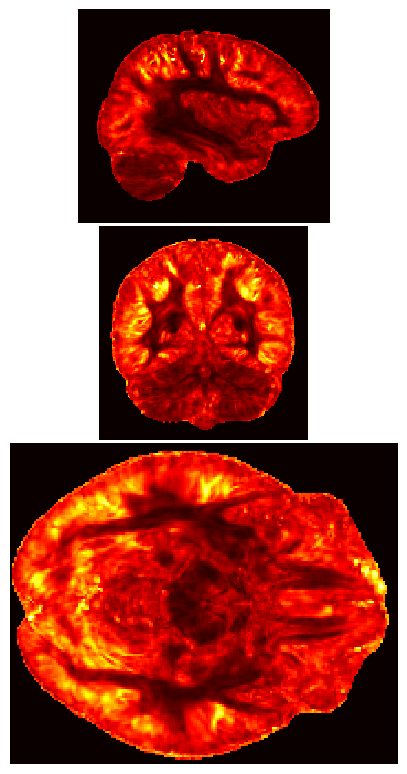

In [36]:
cmap='hot'
pos=[110,50,60]
fig = plt.figure(figsize=(5,10), dpi=100)
    
gs  = gridspec.GridSpec(3,1, height_ratios=[1, 1, 1.5])    
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

plt.subplots_adjust(hspace=0.01)
ax0.imshow((full_CVbs[pos[0],:,:].T[::-1]),cmap=cmap)
ax0.axis('off')
ax1.imshow((full_CVbs[:,pos[1],:].T[::-1]),cmap=cmap)
ax1.axis('off')
ax2.imshow((full_CVbs[:,:,pos[2]]),cmap=cmap)
ax2.axis('off')
plt.colorbar

In [ ]:
plt.imshow(full_CVbs[:,:,])

In [26]:
ICCMask = ICC.get_fdata()>0.7
CVwsMask = CVws.get_fdata()<0.1

In [27]:
Top_Right=(ICCMask.astype(int) + CVwsMask.astype(int)) == 2
Bottom_Left=(ICCMask.astype(int) + CVwsMask.astype(int)) == 0
Top_Left=(ICCMask.astype(int) - ~CVwsMask.astype(int)) == 2
Bottom_Right=(- ~ICCMask.astype(int) + CVwsMask.astype(int)) == 2
Bottom_Right = ~Bottom_Right

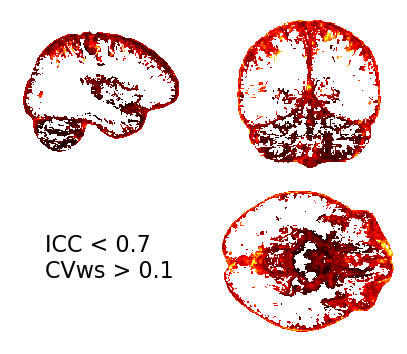

In [28]:
pltthis = mask_data(Image_data,Bottom_Left)
pltthis = unpad_data(pltthis, paddings=[[55,55],[35,45],[0,0]])

astr = 'ICC < 0.7 \nCVws > 0.1'
quadrant_plot(pltthis, astr=astr, blankspace='bottom_left')

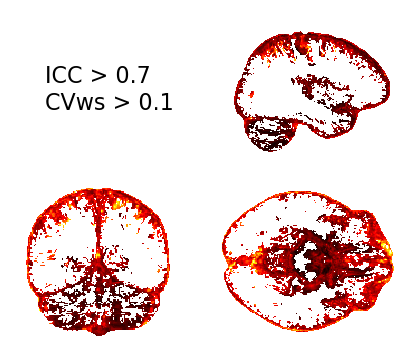

In [29]:
quadrant_plot(pltthis, astr='ICC > 0.7 \nCVws > 0.1', blankspace='top_left')

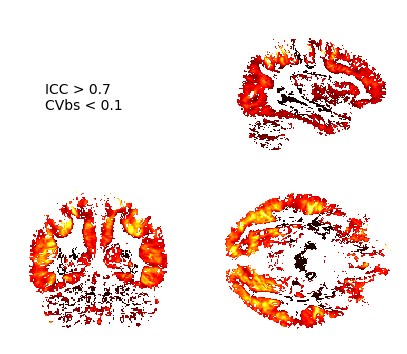

In [123]:
quadrant_plot(unpad_data(mask_data(CVbs.get_fdata(), Top_Left), paddings=[[55,55],[35,45],[0,0]]), blankspace='top_left')

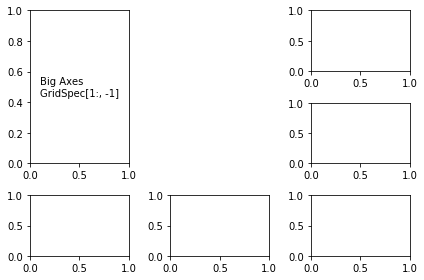

In [155]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:2, 0]:
    ax.remove()
for ax in axs[0:2, 1]:
    ax.remove()
axbig = fig.add_subplot(gs[0:2, 0])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

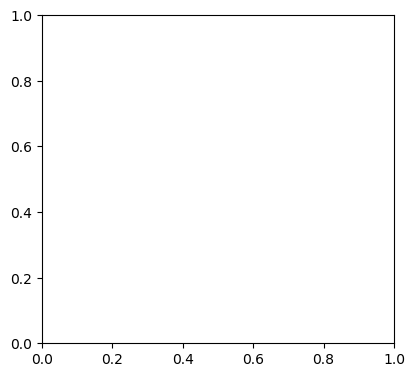

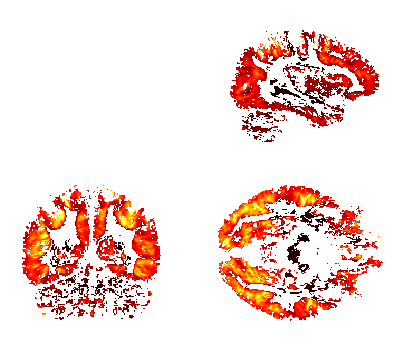

ValueError: x, y, and format string must not be None

In [111]:
def Full_quadrant_plot(data, pos=[110,50,60], cmap='hot'):
    fig = plt.figure(figsize=(5,10), dpi=100)
    
    quads = get_quads(blankspace=blankspace)

    gs  = gridspec.GridSpec(16,4, height_ratios=[1, 1 ,1, 1.5])
    astr = 'ICC > 0.7 \nCVbs < 0.1'
    
    ax0 = plt.subplot(gs[quads[0]])
    ax1 = plt.subplot(gs[quads[1]])
    ax2 = plt.subplot(gs[quads[2]])
    
    ax3 = plt.subplot(gs[quads[3]])
    ax3.axis('off')
    plt.annotate(astr, (0.2,0.4))
    
    plt.subplots_adjust(hspace=0.01)
    ax0.imshow((data[pos[0],:,:].T[::-1]),cmap=cmap)
    ax0.axis('off')
    ax1.imshow((data[:,pos[1],:].T[::-1]),cmap=cmap)
    ax1.axis('off')
    ax2.imshow((data[:,:,pos[2]]),cmap=cmap)
    ax2.axis('off')

    plt.show()

In [85]:
quads[0]

0

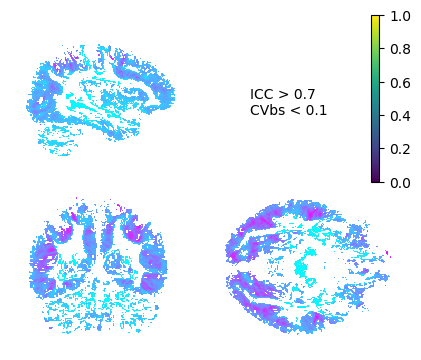

In [102]:
blankspace='top_right'
cmap='cool'
data=pltthis
pos=[110,50,60]
fig = plt.figure(figsize=(5,10), dpi=100)

quads = get_quads(blankspace=blankspace)

astr = 'ICC > 0.7 \nCVbs < 0.1'

gs  = gridspec.GridSpec(4,2, height_ratios=[1, 1 ,1, 1.5])

ax0 = plt.subplot(gs[quads[0]])
ax1 = plt.subplot(gs[quads[1]])
ax2 = plt.subplot(gs[quads[2]])
ax3 = plt.subplot(gs[1])
ax3.axis('off')
plt.annotate(astr, (0.2,0.4))

plt.subplots_adjust(hspace=0.01)
ax0.imshow((data[pos[0],:,:].T[::-1]),cmap=cmap)
ax0.axis('off')
ax1.imshow((data[:,pos[1],:].T[::-1]),cmap=cmap)
ax1.axis('off')
ax2.imshow((data[:,:,pos[2]]),cmap=cmap)
ax2.axis('off')


import matplotlib.cm as cm
fig.colorbar(cm.ScalarMappable())

plt.show()

In [66]:
imdata = FA_ICC_NII.get_fdata()
imdata[np.isnan(imdata)] = 0 
hdr = FA_ICC_NII.header
aff = FA_ICC_NII.affine

In [67]:
FA_ICC_NII_DENAN = nib.Nifti1Image(imdata, aff, hdr)


In [68]:
nib.save(FA_ICC_NII_DENAN,os.path.join(floc,'Fractional_Anisotropy_ICC_denan.nii'))

array([[ 9.99896646e-01,  5.21518406e-04,  1.43705551e-02,
        -1.25554253e+02],
       [ 2.42016884e-03,  9.78984118e-01, -2.03922316e-01,
        -1.12841698e+02],
       [-1.41748935e-02,  2.03936011e-01,  9.78881598e-01,
        -9.97535248e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

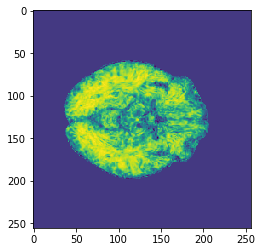

In [48]:
plt.imshow(FA_ICC_NII_DENAN.get_fdata()[:,:,60])